In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import pyspark as pa
from uuid import uuid4 as uidv4

In [3]:
file_path = './data/house.csv'
house = pd.read_csv(file_path)
house.shape

(23677, 12)

In [4]:
house.columns

Index(['市区', '小区', '户型', '朝向', '楼层', '装修情况', '电梯', '面积(㎡)', '价格(万元)', '年份',
       'Id', 'Unnamed: 11'],
      dtype='object')

In [5]:
house.head(3)

,市区,小区,户型,朝向,楼层,装修情况,电梯,面积(㎡),价格(万元),年份,Id,Unnamed: 11
0,朝阳,育慧里一区,1室0厅,西,7,精装,有电梯,52,343,2001,1.01E+11,NaN
1,朝阳,大西洋新城A区,2室2厅,南北,10,精装,有电梯,86,835,1999,1.01E+11,NaN
2,朝阳,团结湖路,2室1厅,东西,6,精装,无电梯,65,430,1980,1.01E+11,NaN


In [6]:
house = house.drop(columns='Unnamed: 11')
house.head(3)

,市区,小区,户型,朝向,楼层,装修情况,电梯,面积(㎡),价格(万元),年份,Id
0,朝阳,育慧里一区,1室0厅,西,7,精装,有电梯,52,343,2001,1.01E+11
1,朝阳,大西洋新城A区,2室2厅,南北,10,精装,有电梯,86,835,1999,1.01E+11
2,朝阳,团结湖路,2室1厅,东西,6,精装,无电梯,65,430,1980,1.01E+11


In [11]:
house["Id"] = house["Id"].apply(lambda _: uidv4())
house.head(3)

,市区,小区,户型,朝向,楼层,装修情况,电梯,面积(㎡),价格(万元),年份,Id
0,朝阳,育慧里一区,1室0厅,西,7,精装,有电梯,52,343,2001,bc913ac6-b0c2-4dab-85e5-108df77a6e93
1,朝阳,大西洋新城A区,2室2厅,南北,10,精装,有电梯,86,835,1999,e1bb4a17-df27-4452-b427-034f69a995e5
2,朝阳,团结湖路,2室1厅,东西,6,精装,无电梯,65,430,1980,caa1c5f7-58e3-4b45-acf3-708a61842203


In [14]:
house.dtypes

市区        object
小区        object
户型        object
朝向        object
楼层        object
装修情况      object
电梯        object
面积(㎡)     object
价格(万元)    object
年份        object
Id        object
dtype: object

In [32]:
def is_floor_valid(floor: object, top: int) -> bool:
    try:
        floor = int(floor)
        return floor > 0 and floor < top 
    except ValueError:
        return False

def is_area_valid(area: object) -> bool:
    try:
        area = int(area)
        return area > 10
    except ValueError:
        return False

house = house[house['楼层'].apply(is_floor_valid, top=40) & house["面积(㎡)"].apply(is_area_valid)]

In [36]:
house_type = {
    '市区': str,
    '小区': str,
    '户型': str,
    '朝向': str,
    '楼层': int,
    '装修情况': str,
    '电梯': str,
    '面积(㎡)': float,
    '价格(万元)': float,
    '年份': int,
    'Id': str,
}
house = house.astype(house_type)
house.dtypes

市区         object
小区         object
户型         object
朝向         object
楼层          int32
装修情况       object
电梯         object
面积(㎡)     float64
价格(万元)    float64
年份          int32
Id         object
dtype: object

In [37]:
house.head(3)

,市区,小区,户型,朝向,楼层,装修情况,电梯,面积(㎡),价格(万元),年份,Id
0,朝阳,育慧里一区,1室0厅,西,7,精装,有电梯,52.0,343.0,2001,bc913ac6-b0c2-4dab-85e5-108df77a6e93
1,朝阳,大西洋新城A区,2室2厅,南北,10,精装,有电梯,86.0,835.0,1999,e1bb4a17-df27-4452-b427-034f69a995e5
2,朝阳,团结湖路,2室1厅,东西,6,精装,无电梯,65.0,430.0,1980,caa1c5f7-58e3-4b45-acf3-708a61842203


In [39]:
house.to_csv('./temp/house.csv', index=False, encoding='utf-8')

In [43]:
biggest_area_rows = house.loc[house["面积(㎡)"].idxmax()]
biggest_area_rows

市区                                          通州
小区                                     新华联科技大厦
户型                                       1房间0卫
朝向                                           南
楼层                                           8
装修情况                                        简装
电梯                                         有电梯
面积(㎡)                                   1019.0
价格(万元)                                  1700.0
年份                                        2009
Id        7420e4a5-8c90-4b31-8e8a-fcf82a599d40
Name: 8728, dtype: object

In [44]:
most_expensive = house.loc[house["价格(万元)"].idxmax()]
most_expensive

市区                                          西城
小区                                         朱雀门
户型                                        4室2厅
朝向                                          东南
楼层                                           5
装修情况                                        其他
电梯                                         有电梯
面积(㎡)                                    376.0
价格(万元)                                  6000.0
年份                                        2008
Id        2de89c9c-8ad0-4311-ad29-b2bef3e5680b
Name: 20390, dtype: object

C:\Users\l9607\AppData\Local\Temp\ipykernel_1120\2894549755.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_house_price = house.groupby("price_bin").size().reset_index(name='Count')
c:\Users\l9607\.conda\envs\data-analysis\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


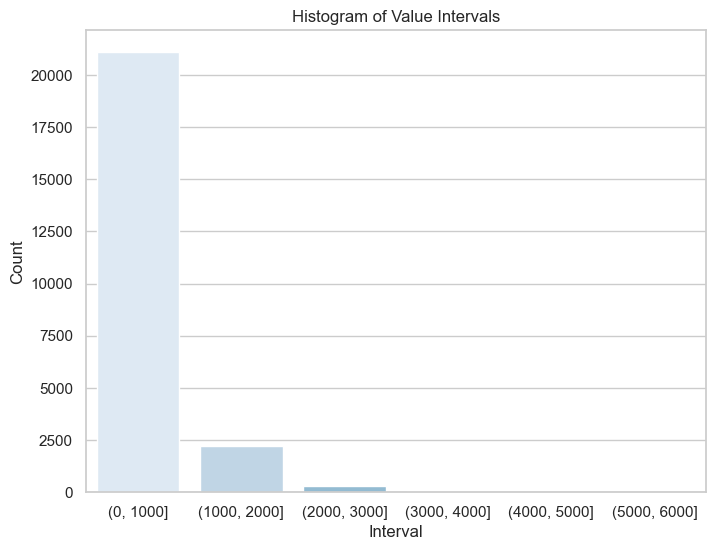

In [75]:
from typing import List

price_intervals: List[int] = np.arange(0, 7000, 1000).tolist()
house['price_bin'] = pd.cut(house["价格(万元)"], bins=price_intervals)
grouped_house_price = house.groupby("price_bin").size().reset_index(name='Count')
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x='price_bin', y='Count', data=grouped_house_price, palette="Blues")
plt.xlabel('Interval')
plt.ylabel('Count')
plt.title('Histogram of Value Intervals')
plt.show()

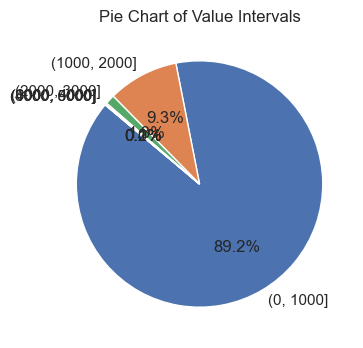

In [76]:
plt.figure(figsize=(4, 4))
plt.pie(grouped_house_price['Count'], labels=grouped_house_price['price_bin'], autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Value Intervals')
plt.show()

C:\Users\l9607\AppData\Local\Temp\ipykernel_1120\306723514.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_house_price = house.groupby("price_bin").size().reset_index(name='Count')
c:\Users\l9607\.conda\envs\data-analysis\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


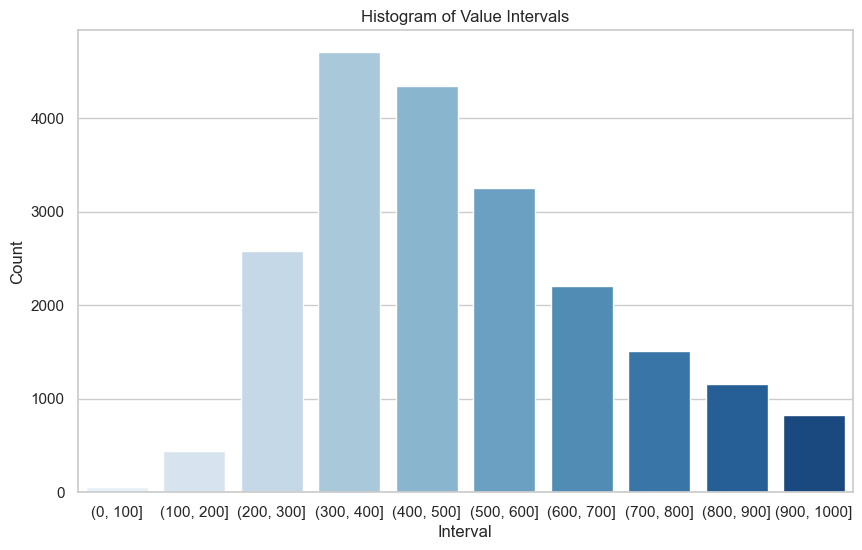

In [78]:
price_intervals = np.arange(0, 1001, 100)
house['price_bin'] = pd.cut(house["价格(万元)"], bins=price_intervals)
grouped_house_price = house.groupby("price_bin").size().reset_index(name='Count')
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='price_bin', y='Count', data=grouped_house_price, palette="Blues")
plt.xlabel('Interval')
plt.ylabel('Count')
plt.title('Histogram of Value Intervals')
plt.show()

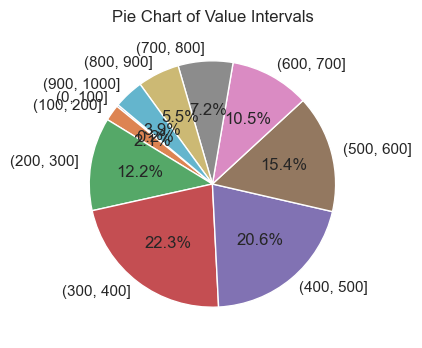

In [79]:
plt.figure(figsize=(4, 4))
plt.pie(grouped_house_price['Count'], labels=grouped_house_price['price_bin'], autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Value Intervals')
plt.show()